# EPOCH 5th Week2 Practice Task
- 3-3. 규제회귀
- 4-1. 로지스틱 회귀
- 4-2. SGDClassifier


## 3-3. 특성 공학과 규제

### 다중회귀

- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 '특성 공학'이라고 함.

In [2]:
# 다중회귀 multiple regression
import pandas as pd

perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [5]:
# 훈련 셋, 테스트 셋 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [6]:
# 다중회귀 클래스 사용 (사이킷런)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [7]:
# 숫자 1(절편) 제거버전 (include_bias)
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [9]:
# 위에서 분할한 train_input을 poly.fit 진행
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [10]:
# 총 9개의 Feature의 이름 확인
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [15]:
# test_input으로 테스트 셋 변환하기
test_poly = poly.transform(test_input)

In [16]:
# 단순 선형회귀 함수를 통한 poly 학습 및 점수 확인
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # train 셋

0.9903183436982125


In [17]:
print(lr.score(test_poly, test_target)) # test 셋

0.9714559911594111


In [19]:
poly = PolynomialFeatures(degree=5, include_bias=False) # 특성을 5제곱까지 추가
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) # 특성이 9개에서 55개로 늘어남

(42, 55)


In [21]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [22]:
print(lr.score(test_poly, test_target)) # 과대적합으로 인한 테스트 셋 불안정화

-144.40579436844948


### 규제

- 과도한 학습을 못하게 규제하는 방법
- 절편 또는 기울기 계수를 규제. (0으로 가깝게 만듬)

In [24]:
# 정규 스케일링을 통해 scale을 조절
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀 (L2 규제)

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) # 다중선형회귀보다 살짝 낮아진 모습

0.9896101671037343


In [27]:
print(ridge.score(test_scaled, test_target)) # test는 이전 음수에서 정상적으로 돌아온 모습

0.9790693977615387


- 규제 alpha가 커질수록 규제 강도가 강해지고, 과소적합을 유도함
- 따라서 하이퍼파라미터 튜닝을 통해 적절한 alpha를 찾아야함

In [36]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [37]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) # 릿지 만들기
    ridge.fit(train_scaled, train_target) # 모델 훈련
    train_score.append(ridge.score(train_scaled, train_target)) # 훈련 점수
    test_score.append(ridge.score(test_scaled, test_target))    # 테스트 점수

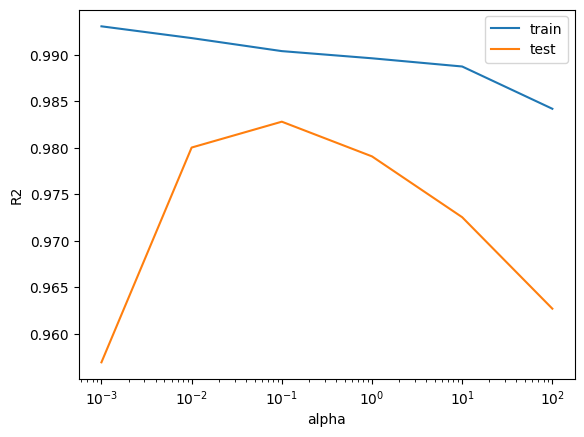

In [41]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(['train', 'test'])
plt.show()

In [42]:
# 테스트 점수가 가장 높은 점인 0.1을 채택하여 모델링 진행
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀 (L1 규제)

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [44]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [46]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000) # 라쏘 모델링
    lasso.fit(train_scaled, train_target)      # 훈련
    train_score.append(lasso.score(train_scaled, train_target)) # 훈련 점수
    test_score.append(lasso.score(test_scaled, test_target))    # 테스트 점수

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


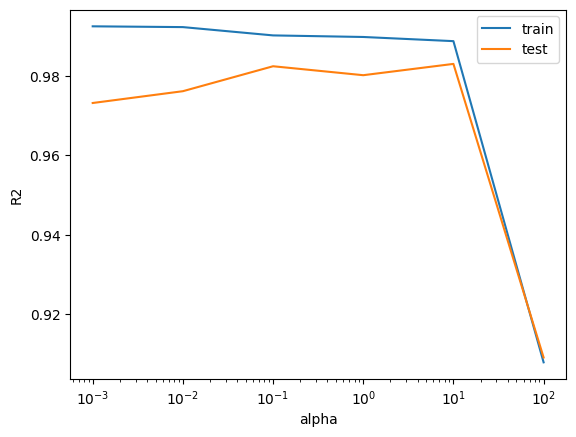

In [48]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(['train', 'test'])
plt.show()

In [49]:
# alpha = 10에서 가장 테스트점수가 높으니 10으로 모델링
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [50]:
# 라쏘의 경우 계수가 0이 될 수 있음 => 변수 선택 (릿지는 0이 되지 않음)
print(np.sum(lasso.coef_ == 0))

40


## 4-1. 로지스틱 회귀

- 해당 아이템이 어느 클래스에 속할지 확인할 때 사용 (확률을 구해보자)
- KNN의 경우 근처 이웃을 찾아준다~

### 럭키백 확률

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species'])) # unique를 활용하여 고유값을 추출하자

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()  # 타겟이 될 Species를 제외하고 input으로 list 저장하자
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy()  # 타겟 Species는 따로 저장

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [9]:
# 정규 스케일링으로 데이터 스케일 맞춰주기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# KNN 사용
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [12]:
print(kn.classes_)  # 자동으로 알파벳 순서로 list가 정렬되니 이 점을 주의하자

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [14]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


Bream Parkki Perch Pike Roach Smelt Whitefish 순서이고 첫 물고기는 3번 Perch일 확률이 1이다. 두 번째 물고기는 6번 Smelt일 확률이 1이다.

In [15]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 4번 물고기가 가능성이 있는 종류를 찾아보자
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이는 1/2, 1/3 등으로 표현이 되기에 좋지 않은 방법이다.

### 로지스틱 회귀

확률로 만들기 위해서는 0과 1사이의 값을 만들어야 한다. 이를 위해 시그모이드 함수라는 것을 사용한다.

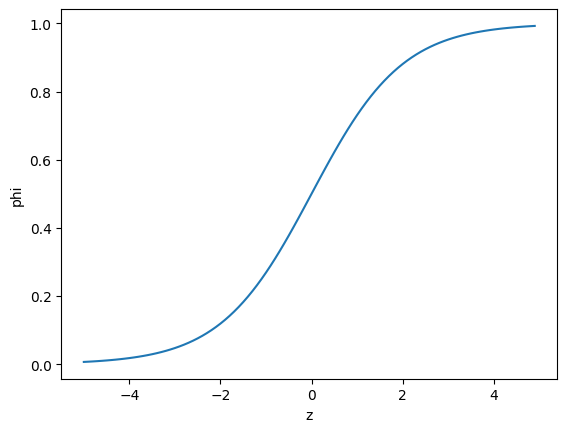

In [16]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [17]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])  # 이진 분류를 진행해보자
print(char_arr[[True, False, True, False, False]]) # 불리안(Boolean) 인덱싱

['A' 'C']


In [18]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [20]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [21]:
print(lr.predict_proba(train_bream_smelt[:5])) # Bream과 Smelt의 확률을 보여준다.

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [23]:
print(lr.classes_)
print(lr.coef_, lr.intercept_) # 로지스틱 회귀의 계수를 볼 수 있음

['Bream' 'Smelt']
[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [24]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [25]:
from scipy.special import expit  # 시그모이드 함수 (지수함수)

print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [26]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [27]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [28]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [30]:
print(lr.classes_)
print(lr.coef_.shape, lr.intercept_.shape)  # 다중 분류로 인한 shape 모형

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)


In [31]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [32]:
from scipy.special import softmax  # 시그모이드 함수 중 softmax함수

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 4-2. 확률적 경사 하강법

- 확률적 경사 하강법: 원하는 지점에 도달할 때까지 무작위적으로 진행하는 방법.
  즉 랜덤하게 샘플을 선택하여 최적의 수를 찾아가는 것
- 미니배치 경사 하강법(Batch): 샘플의 수를 정하여 여러 단계를 거쳐 경사 하강법을 진행하는 것 (epoch에 따라 진행됨)
- 손실 함수(loss function): 오차에 대한 수치적 값을 계산하기 위해 사용하는 함수

In [34]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [35]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [45]:
from sklearn.linear_model import SGDClassifier  # 사이킷런에 존재하는 SGD 불러오기

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)  # 최대 10번 반복, 시드는 42로 고정
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [38]:
sc.partial_fit(train_scaled, train_target)  # 부분적으로 epoch을 진행할 수 있는 함수 (partial_fit)

print(sc.score(train_scaled, train_target)) # 1번 진행하니 테스트 점수가 올라간 모습
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


In [46]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):  # 300번의 epoch을 돌려 훈련 셋과 테스트 셋의 점수가 어떻게 변하는지 확인
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

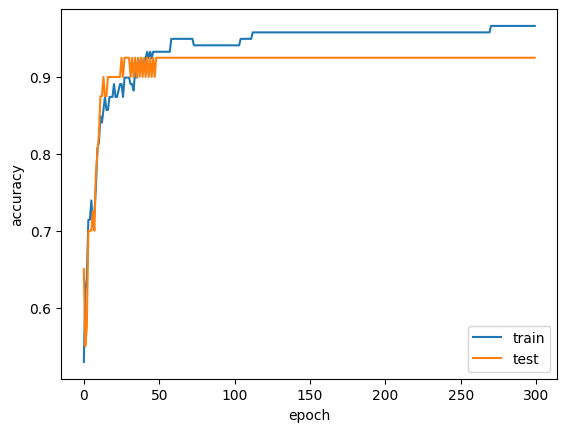

In [48]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [49]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)  # 위 그림을 토대로 epoch을 100으로 맞추어 다시 진행
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [44]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)  # 힌지 손실, SVM
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


## 궁금한 점

1번 질문) 4-2에서 진행한 epoch은 항상 수가 많아질수록 과대적합이 발생할까요? epoch 수를 과도하게 늘려도 과대적합이 안되도록 하는 방법은 존재하지 않나요?

2번 질문) hinge 손실에 대해 궁금합니다. SVM은 경계에 따라 분류 및 회귀를 진행하는 알고리즘인데 해당 알고리즘에서 사용하는 손실함수인 hinge가 경사하강법에서도 같이 적용이 될 수 있다는 것을 시사하는걸까요?